In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [2]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.rcParams.update({'font.size': 18})
data_path = 'data/SVD-Visualization/ovarian_cancer_data.csv'
label_path = 'data/SVD-Visualization/ovarian_cancer_label.csv'

In [3]:
data = np.loadtxt(data_path, delimiter=',')
with open(label_path, 'r') as f:
    label = f.read().split("\n")

label.pop();  # last value is empty

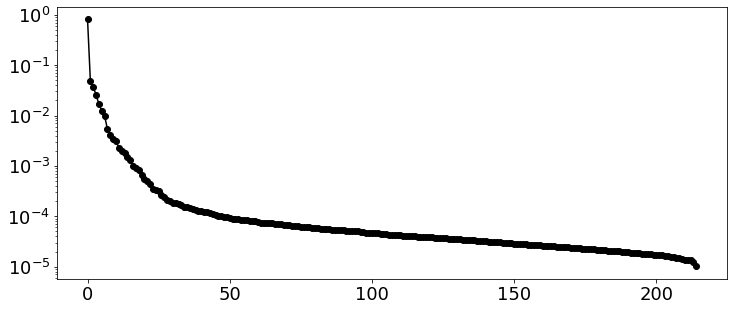

In [4]:
pca = PCA()
pca.fit_transform(data)

var = pca.explained_variance_ratio_
var = np.delete(var, -1)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.semilogy(var, '-o', color='k')
plt.show()

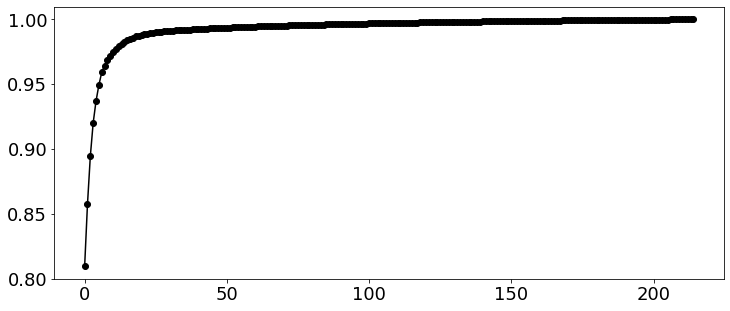

In [5]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(np.cumsum(var) / np.sum(var), '-o', color='k')

plt.show()

In [6]:
pca = PCA(n_components=3, svd_solver='full')
x_transform = pca.fit_transform(data)
pc_df = pd.DataFrame(data=x_transform, columns=['PC1', 'PC2', 'PC3'])
pc_df['Status'] = label
# pca.components as far as I understood it equal to the correlation value between the features

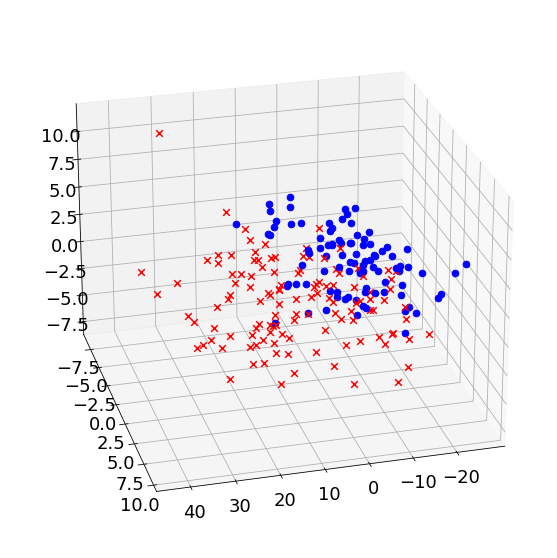

In [7]:
plt.rcParams['figure.figsize'] = [10, 10]

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

marker_size = 44

for _, row in pc_df.iterrows():
    x = row['PC1']
    y = row['PC2']
    z = row['PC3']

    if row['Status'] == 'Cancer':
        ax.scatter(x, y, z, marker='x', color='r', s=marker_size)
    else:
        ax.scatter(x, y, z, marker='o', color='b', s=marker_size)

viewing_angle = (25,75)
ax.view_init(*viewing_angle)
plt.show()